# Crypto-Cosmology, Part 1: Wormhole

## Notebook structure

The notebook is divided into several sections, which should allow for a better reading experience.

* **Context**: this section provides an introduction to the protocols, technology and objective involved in this analysis
* **Data**: briefly presents how the data has been obtained and its structure
* **Key findings**: lists the main discoveries obtained from this analysis
* **Analysis**: the actual process that led to the key findings. This section is divded in subsections for the different aspects analysed. Each section is concluded by an *Observations* section which summarizes the key findings and learnings obtained. The sections are the:
    * **Transactions**
    * **Distinct addresses**
    * **Tokens**
    * **UST transactions**
    * **Chains**
    * **Usage comparison with Terra Bridge**
* **Appendix**: this section contains data preparation and cleaning steps. They are required to be executed before the analysis section, but for better readability we have moved them to the end of the notebook.

## Context

Blockchains usually cannot easily communicate with one another. When this is the case, they are effectively siloes, isolated from the ecosystem of blockchains. Bridges have started to be implemented to allow transfers between different blockchains, unleashing a whole new world of opportunities as assets and users flood from one chain to another. The Terra blockchain had originally only one bridge (Terra Bridge), however recently Wormhole officialy started supporting it.

### Wormhole

[Wormhole]() is a decentralized bridge which connects the Solana, Ethereum, BSC, Polygon and Terra blockchains. Its functioning is based on the consensus of several oracles forming the Wormhole Guardians.
"*At a high level, Wormhole deploys a simple cross-chain attestation model that relies on a group of cross-chain oracles called “Guardians” that operate as a set of node operators with venerated validation track records and strong incentive alignment with the long-term interest of the root chain — Solana.*" from the [Medium article](https://medium.com/terra-money/terra-goes-live-on-wormhole-v2-12df49d446d2).
The official support for the Terra blockchain has been [announced](https://twitter.com/wormholecrypto/status/1450540170348949504) on the 19th of October.

### Terra Bridge

[Terra Bridge](https://bridge.terra.money/) has been the first cross-chain bridge for the Terra blockchain. It supports BSC, Ethereum and Harmony blockchains. It is more centralized than Wormhole, but has been widely used as it was the only available cross-chain solution before the launch of Wormhole.

### Objective

As Wormhole has added Terra support with the Columbus 5 upgrade, we analyze the initial activity and try to identify patterns and behaviors.

Some interesting questions are the followings:
* How many users are engaging, what tokens are they receiving vs sending? 
* Which destinations/sources are most popular? 
* What is the adoption rate, i.e. how rapidly are users choosing to use Wormhole over the Terra-specific Bridge? 
* Anything else you observe of interest?


## Data

In this section we will describe how the data has been queried and its structure.

### Query
Several queries have been performed to retrieve data regarding both bridges.

For each bridge, we provide a quick overview of the key points that our queries are constructed upon.

**Wormhole related queries**

The contract address of the Wormhole smart contract is: *terra10nmmwe8r3g99a9newtqa7a75xfgs2e8z87r2sf*.
Transactions that sent assets by calling that contract and executed the message *initiate_transfer* have been queried as Wormhole transactions, sending assets from Terra to other chains. This type of transaction also included the *recipient_chain* field which is an integer representing the destination chain. The mapping is the following:

* 1: Solana
* 2: Ethereum
* 3: Terra
* 4: BSC
* 5: Polygon

Terra transaction receiving Terra native assets from other chains via Wormhole have been identified as the ones having the sender as the Wormhole contract and being of the event_type *transfer*. Unfortunately, these transactions do not allow to identify the source chain and we therefore don't have this information for this kind of transactions.

For wrapped assets received from other chains, we identified transactions with the contract address as the one for the Wormhole and the action *complete_transfer_wrapped*. Again, no source chain info is available.

The complete queries can be found here:
* [Native tokens (Luna and uusd) received on Terra from the Wormhole](https://app.flipsidecrypto.com/velocity/queries/657279fb-8a07-4089-bf08-307fb7f1325d)
* [Wrapped tokens received on Terra from the Wormhole](https://app.flipsidecrypto.com/velocity/queries/f5ee257d-91d9-4a1d-a3e3-c2cd14f7790b)
* [Assets sent from Terra to other chains using Wormhole](https://app.flipsidecrypto.com/velocity/queries/6cecbc05-4540-4c33-9557-585aec1af791)

**Terra bridge related queries**

Each chain supported by the Terra Bridge has its own address. Send and receive transactions involving one specific chain, are always directed or received from that contract. We therefore queried transactions from and to those addresses and labeled them accordingly. The contract addresses for each chain are the followings:

* ETH: terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc
* BSC: terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2
* Harmony: terra1rtn03a9l3qsc0a9verxwj00afs93mlm0yr7chk

Queries have been divided due to API space limitations. The complete queries can be found here:
* [Assets sent from Terra to other chains using Terra Bridge](https://app.flipsidecrypto.com/velocity/queries/e6369cbf-6ea1-4d84-9e45-38ad88caea73)
* [Assets received from Ethereum via Terra Bridge](https://app.flipsidecrypto.com/velocity/queries/a1688e27-7fcf-44ad-b849-e61dd638d8e1)
* [Assets received from other chains (not Ethereum) via Terra Bridge Pt. 1](https://app.flipsidecrypto.com/velocity/queries/f6ac0f33-eaee-4983-82c3-7bba1ccc0bc2)
* [Assets received from other chains (not Ethereum) via Terra Bridge Pt. 2](https://app.flipsidecrypto.com/velocity/queries/f566ad03-b305-448c-8a14-7908c0bfa7d7)

### Structure

* Each record in the dataframe reppresent either a send or receive transaction from/to one of the two bridge
* The record generally present the sender address, receiver address, contract address, amount, token (denom or token address for wrapped tokens), timestamp and destination chain (not for receive tx from Wormhole).


## Key Findings
* Around 2000 distinct addresses have been interacting with the Wormhole since its official support for Terra chain, and on average about 150 distinct addresses interacted daily with it. 50% of all the addresses have performed 2 or fewer tranactions
* We have observed a total of almost 6k transactions performed using the Wormhole since its launch on Terra up until the 14th of November, and an average of 220 transactions have been performed daily
* A large plethora of assets has been transferred via Wormole. However, the number of transactions and amounts transferred is concentrated in few assets: 
    * If we look at the number of transactions, UST is by far the most transferred asset
    * If we look at the amount transferred, ORION is the most popular asset. This is explained by their mid November launch on Terra and the need to transfer funds from Ethereum/BSC
* A total of 160 million of UST has been sent from Terra to other chains via Wormhole and 40 mlillion UST has been received. This means that 4 times more UST has exited the Terra blockchain than it has entered. This is a good sign, as it indicates that UST is indeed flooding to other ecosystems
* Solana is by far the preferred destination chain in terms of number of transactions (83%)
    * In terms of total amount of UST transferred, Solana is still the most preferred chain, but only twice as much total UST transferred (100 millions) compared to Ethereum (50 millions)
    * We have also seen that some of the largest UST transactions occured towards Ethereum. Ethereum is notably very expensive and it makes sense that those operating on it deal with large sums
* Regarding the activity on the Terra Bridge: The number of daily transactions towards/from BSC and Ethereum was increasing before Wormhole launched, and has since been decreasing with an average of 24 fewer transactions per day

# Analysis

The analysis focuses on the Wormhole activity. Later on in the notebook we will include data from the Terra Bridge to carry on a comparison.

## Transactions

First of all, let's look at the transactions.

**How many Wormhole transactions have been executed?**

In [26]:
wh_receive_.tx_id.count() + wh_send.tx_id.count()

5998

**What is the number of daily transactions?**

In [29]:
tot_daily_txs = wh_send[['month_day', 'tx_id']].append(wh_receive_[['month_day', 'tx_id']])
daily_tx = add_missing_days(tot_daily_txs.groupby("month_day").tx_id.count())
daily_tx.mean()

153.7948717948718

**What does it look like over time?**

<AxesSubplot:xlabel='Day', ylabel='Number of daily transactions'>

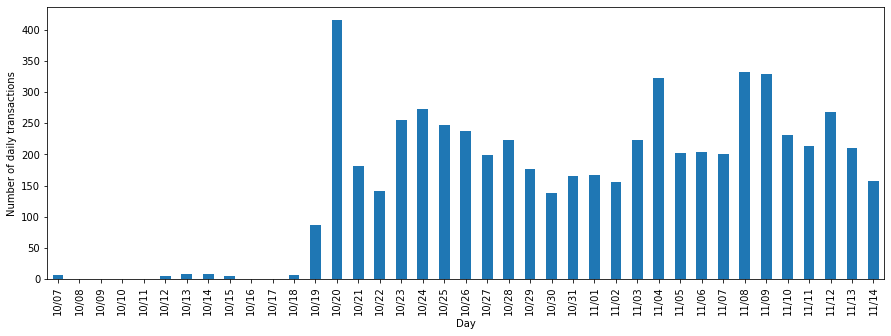

In [30]:
tot_daily_txs = wh_send[['month_day', 'tx_id']].append(wh_receive_[['month_day', 'tx_id']])
daily_tx = add_missing_days(tot_daily_txs.groupby("month_day").tx_id.count())
ax = daily_tx.plot(kind='bar')
ax.set(ylabel='Number of daily transactions', xlabel='Day')
ax

It looks like we have few transactions from before the official Wormhole support for Terra (19/10). These are possibly test transactions. We might have to exclude them to obtain a realistic average number of daily transactions.

In [31]:
daily_tx[daily_tx.index > '10/18'].mean()

220.74074074074073

**What is the ratio between send and receive transactions?**

In [32]:
f"{'{:.2f}'.format(wh_receive_.tx_id.count()/(wh_send.tx_id.count()+wh_receive_.tx_id.count()) * 100)}%"

'49.58%'

**What does the daily ratio look like over time?**

[Text(0, 0.5, 'Number of daily transactions'), Text(0.5, 0, 'Day')]

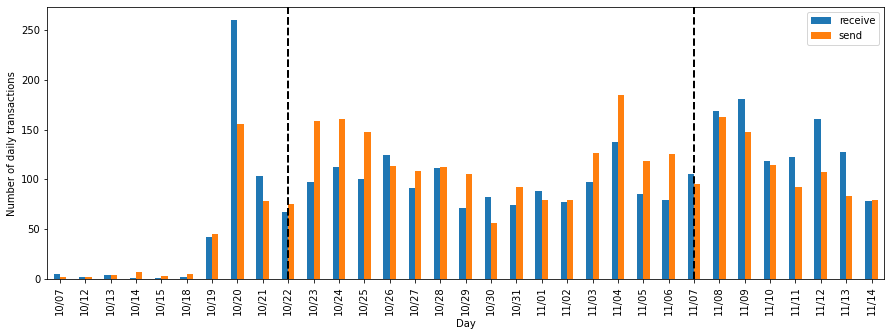

In [33]:
ax = pd.concat([wh_receive_.groupby("month_day").tx_id.count().rename('receive'),\
               wh_send.groupby("month_day").tx_id.count().rename('send')], axis=1).plot(kind='bar')
ax.axvline(ymin=0, x=9, ymax=600, color='black', linestyle='--', lw=2)
ax.axvline(ymin=0, x=25, ymax=600, color='black', linestyle='--', lw=2)
ax.axvline(ymin=0, x=9, ymax=600, color='black', linestyle='--', lw=2)
ax.set(ylabel='Number of daily transactions', xlabel='Day')

**Observations**
* We have recorded a total of almost 6k transactions performed using the Wormhole since its launch on Terra up until the 14th of November
* On average 220 transactions are performed daily
* The distribution between send and receive transaction seems fairly balanced, with 49% of all transactions being receive transactions.
* The ratio of the two types of operation over time shows three main periods (dashed lines). The first period saw a higher number of receive txs compared to send ones. Between the two line, we saw an increase of send txs and lately we saw receive txs catching up again and surpassing send txs. This is interesting as it is a sign of liquidity entering and exiting the Terra blockchain periodically, possibly following yield and farming opportunities where they are most attractive. 

## Distinct address
Let's now focus on distinct addresses (hence, in most cases distinct users, unless the same user has multiple addresses)

**What is the number of distinct users that interacted with Wormhole from Terra so far?**

In [34]:
fields = ['block_timestamp', 'address', 'amount', 'token_name']
wh_send.rename(columns={'sender':'address'}, inplace=True)
wh_receive_['address'] = wh_receive.apply(lambda row: row.recipient if row.original_sender == 'terra10nmmwe8r3g99a9newtqa7a75xfgs2e8z87r2sf'\
                     else row.original_sender, axis=1)
tot_unique_addr = wh_send[['month_day', 'address']].append(wh_receive_[['month_day', 'address']])
len(tot_unique_addr.address.unique())

2295

**What about over time?**

In [35]:
daily_unique_addresses = add_missing_days(tot_unique_addr.groupby("month_day").address.nunique())

[]

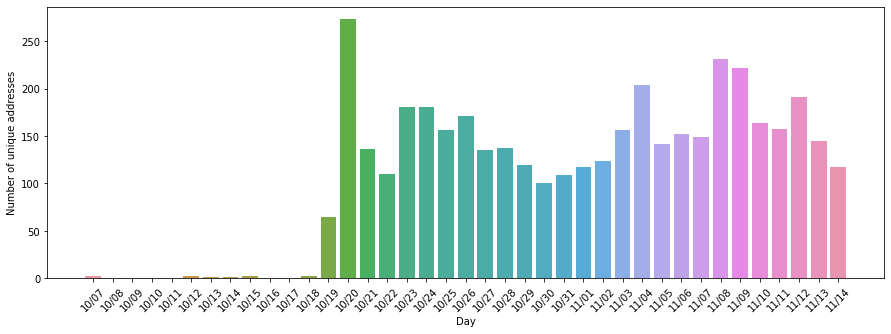

In [36]:
plt.xticks(rotation=45)
ax = sns.barplot(daily_unique_addresses.index, daily_unique_addresses.values)
ax.set(ylabel='Number of unique addresses', xlabel='Day')
ax.plot()

**What is the daily average number of distinct users interacting with Wormhole?**

In [37]:
daily_unique_addresses[daily_unique_addresses.index > '10/18'].mean()

153.55555555555554

**How many transaction has each address performed?**

[]

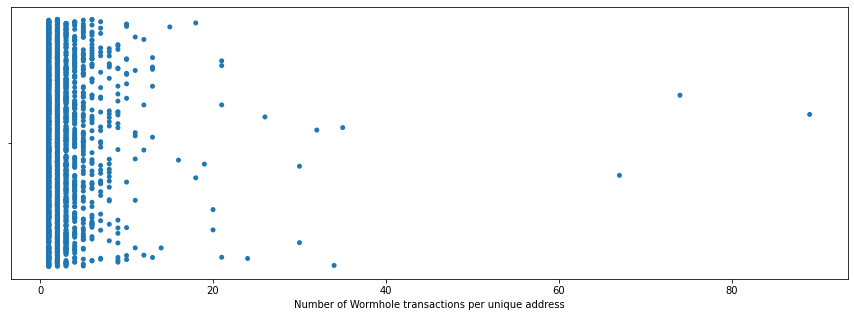

In [78]:
tot_unique_addr.address.value_counts().quantile([0.9,0.99])
ax = sns.stripplot(tot_unique_addr.address.value_counts())
ax.set(xlabel='Number of Wormhole transactions per unique address')
ax.plot()

We can see a high concentration of addresses which have performed roughly less than 10 transactions. Only a handful has performed more than 10 transactions, with a maximum of over 80 transaction.

Let's calculate some percentiles to give a more precise value to our observations.

In [79]:
tot_unique_addr.address.value_counts().quantile([0.5,0.9,0.99])

0.50     2.0
0.90     5.0
0.99    13.0
Name: address, dtype: float64

Top performing address:

In [80]:
df = tot_unique_addr.address.value_counts().reset_index()
df[df.index==df.address.idxmax()]

,index,address
0,terra1vrq3yzujgmfrqyp6der9w8j3audmw497tgpytl,89


**Observations**
* More than 2k distinct addresses have benn interacting with the Wormhole since its official support for Terra chain
* On average about 150 distinct addresses interact with the Wormhole daily
* The distribution over time shows three major spikes around the 20th October (the launch date), the 4th of November and the 8th and 9th of November. The number has since been decresing
* 50% of all the address has performed 2 or fewer tranactions
* 99% of all addresses has performed 13 or fewer transactions
* The address with the highest number of transactions has performed 89 transactions

## Tokens

Let's now investigate what tokens and in which ratio have been transferred via Wormhole.

In [41]:
token_txs = pd.concat([wh_receive_.token_name.value_counts(), wh_send.token_name.value_counts()], axis=1).fillna(0)

In [42]:
token_amounts = pd.concat([wh_receive_.groupby("token_name").amount.sum(), wh_send.groupby("token_name").amount.sum()], axis=1).fillna(0)

**What tokens have been sent/received?**

In [43]:
wh_receive_.token_name.append(wh_send.token_name).unique()

array(['uluna', 'uusd', 'ORION_Terra', 'whORION_BSC', 'wh_Solana',
       'whUSDT_BSC', 'whWETH_Ethereum', 'whWBNB_BSC', 'whSOL_Solana',
       'whUSDT_Ethereum', 'whWBTC_Ethereum', 'whATOM_BSC',
       'whUSDC_Polygon', 'whUST_Polygon', '', 'whLUNA_Polygon',
       'whETH_Solana', 'whMIR_BSC', 'whUSDT_Polygon', 'MIR_Terra',
       'ANC_Terra', 'MINE_Terra'], dtype=object)

**Number of transactions: what tokens are most popular?**

[Text(0, 0.5, 'Number of transactions'), Text(0.5, 0, 'Asset transferred')]

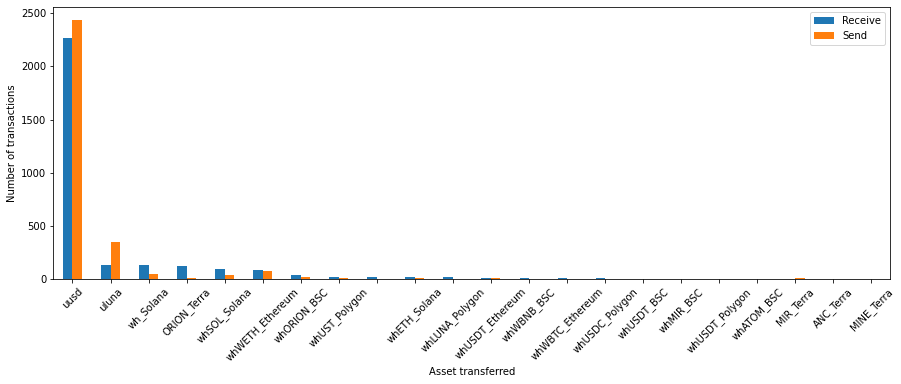

In [44]:
token_txs.columns = ['Receive','Send']
ax = token_txs.plot(kind='bar', rot=45)
ax.set(ylabel='Number of transactions', xlabel='Asset transferred')

**Amount transferred: what tokens are most popular?**

[Text(0, 0.5, 'Total amount transferred'), Text(0.5, 0, 'Asset')]

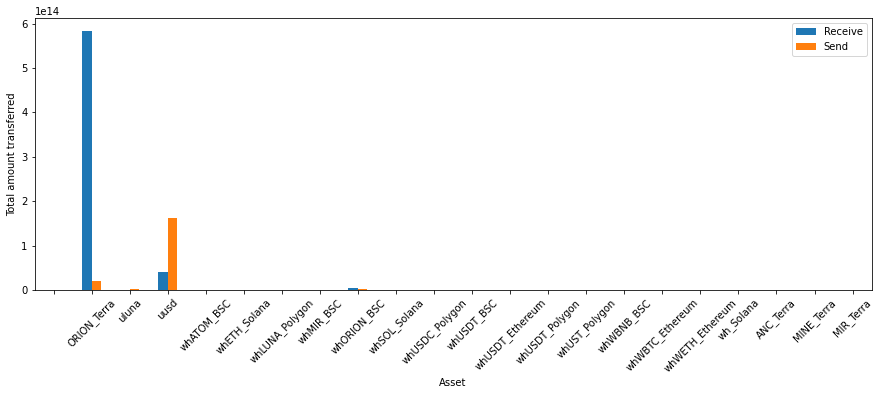

In [45]:
token_amounts.columns = ['Receive','Send']
ax = token_amounts.plot(kind='bar', rot=45)
ax.set(ylabel='Total amount transferred', xlabel='Asset')

Interesting to notice that ORION is by far the asset with the highest amount transferred. In particular, the large amount has been tranferred from another chain to Terra. Let's take a closer look at the single transactions for these large transfers

In [46]:
wh_receive_.sort_values(by="amount", ascending=False).head()

,amount,block_timestamp,recipient,original_sender,sender,tx_id,token_name,month_day,year_month_day,address
411,406000000000000,2021-11-02 20:40:03+00:00,"""terra1w5l9ggryqy8q49pyfl9gqrfwdugynmd09xvwlk""","""terra1w5l9ggryqy8q49pyfl9gqrfwdugynmd09xvwlk""","""terra1w5l9ggryqy8q49pyfl9gqrfwdugynmd09xvwlk""",1060A41659F5B72523815A0AD888AF69FA729EF722D06239400C2D8A80A48798,ORION_Terra,11/02,2021/11/02,terra1av4url459ywc7gzwrktjmdl7xlnq0nu5rcg3vd
150,14285714285714,2021-11-09 00:45:20+00:00,"""terra15ly4zprkshh73k59g6ssdf3027zl6nd59rljpe""","""terra15ly4zprkshh73k59g6ssdf3027zl6nd59rljpe""","""terra15ly4zprkshh73k59g6ssdf3027zl6nd59rljpe""",9BC236FB9B447BCC445BC4E2DFCE9826AC2A577FADBD4F00527DE7CC7C81165B,ORION_Terra,11/09,2021/11/09,terra1gfw99g5zxpjr06a6vwahnmc8xt7nq5wmuqjj7r
389,13356283590000,2021-11-09 14:37:01+00:00,"""terra12chw9xgz3wg6q50vtqru932n095pyt4lwxg97c""","""terra12chw9xgz3wg6q50vtqru932n095pyt4lwxg97c""","""terra12chw9xgz3wg6q50vtqru932n095pyt4lwxg97c""",5A0888B65EE2815AAB30467A833597FD1C27B6AE86418EB879871EC46B3398A3,ORION_Terra,11/09,2021/11/09,terra13fu2g7awm2q8mpalaxx9jv5lm2rqx0uefhcn0e
32,9946383000000,2021-11-14 21:27:14+00:00,"""terra18dhzhvr76z0n668gcx242p35z7wuyd8xt0aq4t""","""terra18dhzhvr76z0n668gcx242p35z7wuyd8xt0aq4t""","""terra18dhzhvr76z0n668gcx242p35z7wuyd8xt0aq4t""",68C7284239F59499F17E16BA75D5CD57F75A6939548580CD8B15B79DC6DCB2AC,ORION_Terra,11/14,2021/11/14,terra1sr9xq8v479zsrv5uujm88nled5p2c4gmyfdxes
458,8534334894831,2021-11-09 00:33:47+00:00,"""terra15ly4zprkshh73k59g6ssdf3027zl6nd59rljpe""","""terra15ly4zprkshh73k59g6ssdf3027zl6nd59rljpe""","""terra15ly4zprkshh73k59g6ssdf3027zl6nd59rljpe""",FF43F3079405E45E72AC5934CF9929564F838292144DEAF560B74FE381534148,ORION_Terra,11/09,2021/11/09,terra1xt0wyu3nrkc3s4smyksc2y4n9jzahm5acnmh35


Indeed, ORION has been trasferring large amounts in the first part of November. This is in line with the fact that ORION originally launched on Ethereum and has planned to launch on Terra in mid November. Hence the need to transfer assets to provide liquidity on Terra. The largest amount transferred in one single transaction has been 406 milions of ORION.

Let's now look at the highest amounts tranferred if we exclude ORION and UST.

[Text(0, 0.5, 'Total of amount transferred'), Text(0.5, 0, 'Asset')]

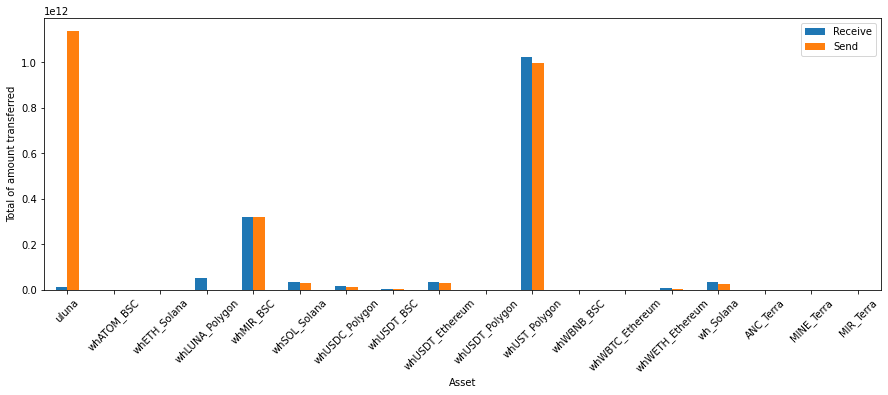

In [47]:
ax = token_amounts[(token_amounts.index != 'whORION_BSC')& (token_amounts.index != 'ORION_Terra') & (token_amounts.index != '')\
                       & (token_amounts.index != 'uusd')].plot(kind='bar', rot=45)
ax.set(ylabel='Total of amount transferred', xlabel='Asset')

**Observations**
* A large plethora of assets has been transferred via Wormole
* However, the number of transactions and amounts transferred is concentrated in few assets
* If we look at the number of transactions, UST is by far the most transferred asset
* If we look at the amount transferred, ORION is the most popular asset. This is explained by their mid November launch on Terra and the need to transfer funds from Ethereum/BSC
* Following ORION, we have UST, Luna (mostly sent) and whUST from Polygon (mostly received)

## UST transactions

Given that UST transactions are the most common ones, and UST is the flagship product of the Terra blockchain and its adoption cross-chain is crucial for the success of Terra, let's dive into some patterns and metrics UST related.

In [48]:
wh_receive_ust = wh_receive_[wh_receive_.token_name == 'uusd']
wh_send_ust = wh_send[wh_send.token_name == 'uusd']

**What is the total amount of ust sent via Wormhole?**

In [49]:
f"{'{0:.2f}'.format(wh_send_ust.amount.sum()/1000000/1000000)} millions"

'162.68 millions'

**What is the total amount of ust received via Wormhole?**

In [50]:
f"{'{0:.2f}'.format(wh_receive_ust.amount.sum()/1000000/1000000)} millions"

'40.83 millions'

**What does the distribution of amounts per transaction look like?**

<AxesSubplot:xlabel='Thousands of UST transferred per transaction', ylabel='Tyoe of transaction'>

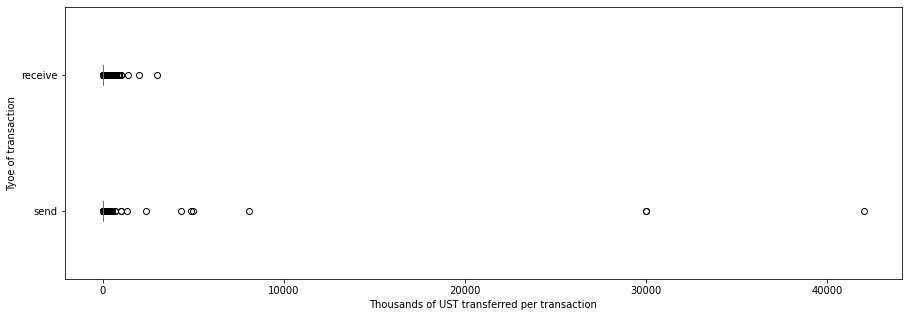

In [51]:
ax = pd.concat([(wh_send_ust.amount/1000000000).rename('send'),
                  (wh_receive_ust.amount/1000000000).rename('receive')], axis=1).plot(kind='box', vert=False)
ax.set(xlabel='Thousands of UST transferred per transaction', ylabel='Tyoe of transaction')
ax

It looks like there are some outliers, that have transferred large amounts of UST compared to the vast majority of transactions, which transferred smaller amounts.

**What are the 90th percentiles of the send/receive transactions?**

In [52]:
wh_receive_ust[wh_receive_ust.amount < (wh_receive_ust.amount/1000000).quantile([.90, .99]).iloc[0]].amount.mean()

5818.4324324324325

In [53]:
wh_send_ust[wh_send_ust.amount < (wh_send_ust.amount/1000000).quantile([.90, .99]).iloc[0]].amount.mean()

7779.0

**What are the largest amounts transferred?**

In [54]:
(wh_send_ust.amount/1000000).max()

41999990.0

In [55]:
(wh_receive_ust.amount/1000000).max()

2999998.584091

**Observations**
* A total of 160 million of UST has been sent from Terra to other chains via Wormhole
* A total of 40 mlillion UST has been received from other chains via Wormhole
* 4 times more UST has exited the Terra blockchain then entered. This is a good sign as it indicates that UST is indeed flooding to other ecosystems
* The amount per transaction is in 99% of the cases less than 5800 UST (99th percentile) for outgoing transactions (send) and 7779 for incoming transactions (receive)
* A small chucnk of transaction has high amounts, with the biggest outgoing transaction transferring 41 million and the biggest ingoing 29 million UST.

## Chains

Let's now look at what chains are the preffered destinations for tokens sent from the Terra blockchain via Wormhole.<br/>
**Disclaimer:** unfortunately, the destination chain is only available in the send transaction and we will therefore focus this section of the analysis only on outgoing transactions.

In [83]:
wh_send["recipient_chain_name"]=wh_send.recipient_chain.apply(lambda x: chain_ids[x-1])

**What is the total number of transactions per chain in percentage?**

In [58]:
wh_send.recipient_chain_name.value_counts(normalize=True)*100

Solana      83.664021
BSC         10.912698
Ethereum     4.166667
Polygon      1.256614
Name: recipient_chain_name, dtype: float64

Let's now visualize it

[Text(0, 0.5, 'Number of transactions'), Text(0.5, 0, 'Destination chain')]

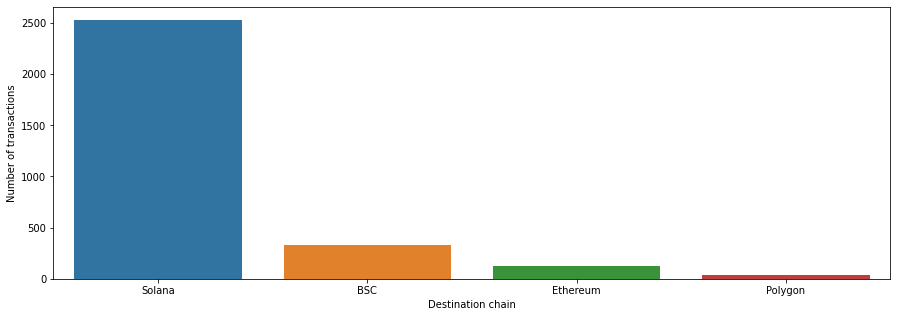

In [59]:
df = wh_send.recipient_chain_name.value_counts()
ax = sns.barplot(df.index,df.values)
ax.set(ylabel='Number of transactions', xlabel='Destination chain')

**What is the total amount of UST tranferred per chain?**

[Text(0, 0.5, 'Total amount transferred (Millions of UST)'),
 Text(0.5, 0, 'Destination chain')]

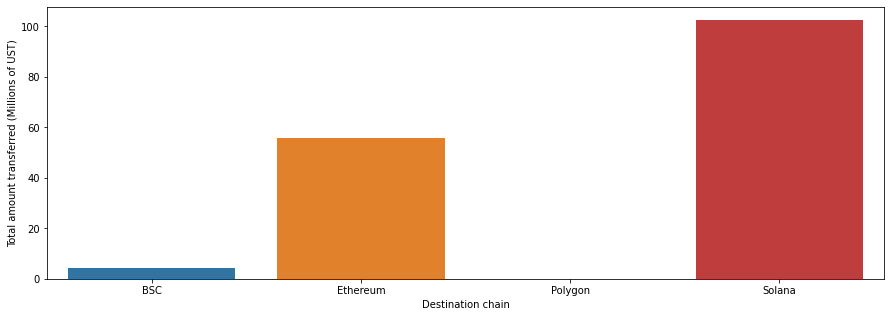

In [60]:
df = (wh_send[wh_send.denom=='uusd'].groupby("recipient_chain_name").sum().amount)/1000000/1000000
ax = sns.barplot(df.index,df.values)
ax.set(ylabel='Total amount transferred (Millions of UST)', xlabel='Destination chain')

The gap between Solana and Ethereum is smaller than the one observed in the number of transactions

**Does the amount of UST per transaction differ for the different chains?**

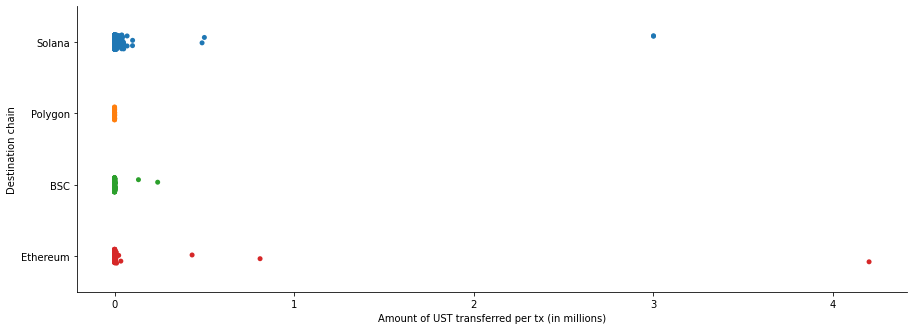

In [61]:
df = wh_send[(wh_send.denom=='uusd')]
df.amount = df.amount/1000000/10000000
ax = sns.catplot(y="recipient_chain_name", x="amount", data=df, height=4.5, aspect=2.8)
ax.set(ylabel='Destination chain', xlabel='Amount of UST transferred per tx (in millions)')

We can see the presence of the outliers identified previously in the UST section. However, it is can be noticed that, although the number of transactions towards Ethreum is much smaller than the ones towards Solana, Ethereum is the destination of the highest amount of UST transferred in one single transaction (3 of top 6 the largest UST transactions along with Solana). This can be explained by the fact that being Ethereum very expensive in gas fees, it is worth using mostly for large capitals.

**What does the number of transactions towards the different chains look like over time?**

[]

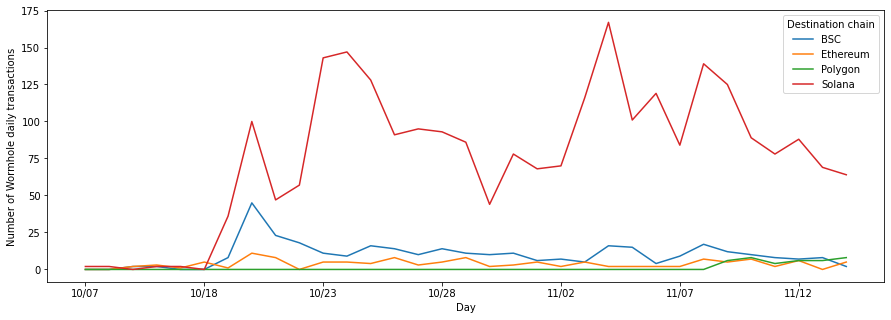

In [62]:
df = wh_send.groupby(["recipient_chain_name","month_day"]).count().reset_index()\
    .pivot(index='month_day', columns='recipient_chain_name', values='tx_id')
df.columns.name='Destination chain'
ax = df.fillna(0)\
        .reset_index()\
        .set_index("month_day").plot(kind="line")
ax.set(ylabel='Number of Wormhole daily transactions', xlabel='Day')
ax.plot()

Solana has represented the largest destination chains in terms of daily transactions since the launch of Wormhole. However, it can be seen that the other 3 chains have exchanged as the most popular chain after Solana. Let's zoom on them.

[]

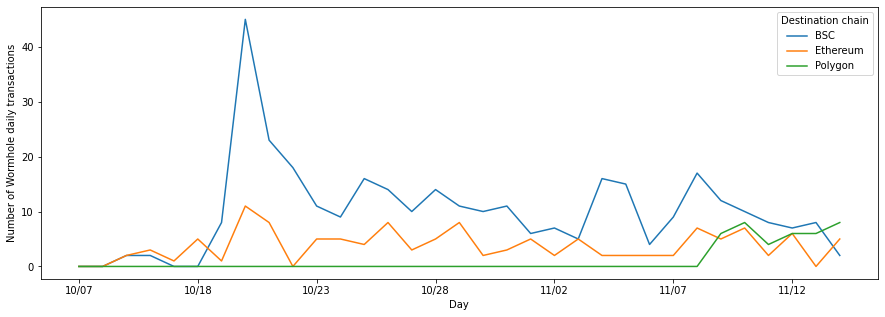

In [63]:
df = wh_send.groupby(["recipient_chain_name","month_day"]).count().reset_index()\
    .pivot(index='month_day', columns='recipient_chain_name', values='tx_id')
df.columns.name='Destination chain'
ax = df.drop(columns=['Solana']).fillna(0)\
        .reset_index()\
        .set_index("month_day").plot(kind="line")
ax.set(ylabel='Number of Wormhole daily transactions', xlabel='Day')
ax.plot()

We can observe that the BSC has been in the lead for quite some time, especially with a quite high spike in the beginning, since the launch. However, it has recently (in the last days) dropped in usage, in favor of Ethereum but most notably Polygon, for which support has been just launched. This can be explained with the fact that these are all EVM chains. BSC represented the cheapest and only EVM solution to Ethereum, at least until Polygon became available.

**Observations**
* Solana is by far the preferred destination chain in terms of number of transactions (83%)
* In terms of total amount of UST transferred, Solana is still the most preferred chain, but only with twice as much total UST transferred (100 millions) compared to Ethereum (50 millions)
* We have also seen that some of the largest UST transactions occured towards Ethereum. Ethereum is notably very expensive and it makes sense that those operating on it deal with large sums
* Solana has been in the lead since the launch of the Wormhole. However, BSC, which has been second after Solana up until recently, has seen its second place overtaken by the recently supported Polygon

## Usage comparison with Terra Bridge

Before Wormhole support for Terra blockchain, the only available cross-chain bridge was Terra Bridge.
Let's compare the usage of Terra Bridge before and after the launch of Wormhole to see if we can see any difference.

**First of all, let's provide some context. How many transactions do we have for each operation?**

In [64]:
tb_all.type_op.value_counts()

RECEIVE    250644
SEND        98785
Name: type_op, dtype: int64

**What chains can be reached, and how many transactions targeted/came from each chain?**

In [65]:
tb_all.chain.value_counts()

BSC         264557
Ethereum     70018
Harmony      14854
Name: chain, dtype: int64

**Let's plot the number of transaction over time for each chain**

<AxesSubplot:xlabel='Day', ylabel='Number of Terra Bridge daily transactions'>

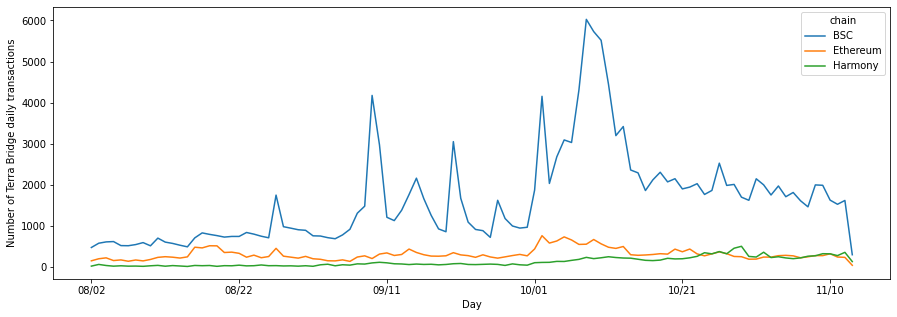

In [66]:
ax = tb_all[tb_all.year_month_day > '2021/08/01'].groupby(["chain","month_day"]).count().reset_index()\
    .pivot(index='month_day', columns='chain', values='tx_id')\
    .fillna(0)\
    .reset_index()\
    .set_index("month_day").plot(kind="line")
ax.set(ylabel='Number of Terra Bridge daily transactions', xlabel='Day')
ax

We can observe that BSC has been the most popular destination/source chain for Terra Bridge, which is something we have noticed for the Wormhole usage as well (after Solana). However, we can notice a slightly downtrend in BSC starting around the 19th of October (the day Wormhole launched). From now on, we exclude Harmony, as that chain is not reachable from Womrhole and should therefore not be affected by Wormhole launch.

In [67]:
chains_to_compare = ['BSC','Ethereum']

<AxesSubplot:xlabel='Day', ylabel='Number of Terra Bridge daily transactions'>

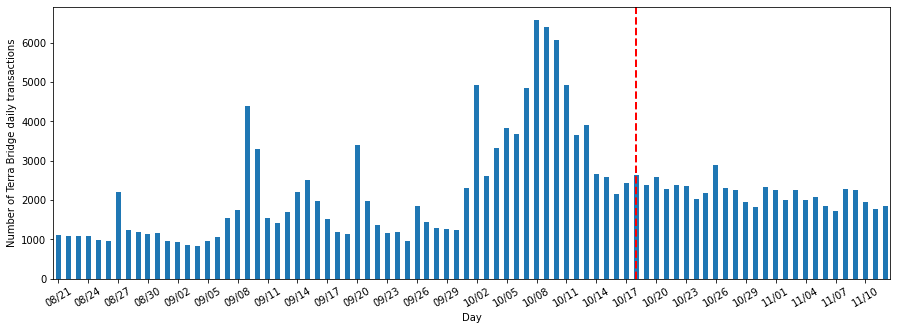

In [68]:
df = tb_all[(tb_all.year_month_day > '2021/08/20')&(tb_all.chain.isin(chains_to_compare))]\
    .groupby("month_day").count().tx_id.sort_index()[:-1]
ax = df.plot(kind='bar', rot=30)
ax.axvline(ymin=0, x=58, ymax=600, color='r', linestyle='--', lw=2)
ax.set_xticks([i for i in range(len(df.index))][0::3])
ax.set(ylabel='Number of Terra Bridge daily transactions', xlabel='Day')
ax

The red line reppresents the day Wormhole launched and we can notice a downtrend in the number of daily transactions after that. Let's try to quantify it by fitting a regression line to the two periods.

**Before the Wormhole launch**

In [69]:
before_wh = tb_all[(tb_all.year_month_day > '2021/09/01')&(tb_all.month_day < '10/18')&\
            (tb_all.chain.isin(chains_to_compare))]\
    .groupby("month_day").count().tx_id
linregress([i for i in range(len(before_wh.values))],before_wh.values)

LinregressResult(slope=65.3414122725871, intercept=1028.100832562442, rvalue=0.562555120760857, pvalue=4.7182303842592325e-05, stderr=14.476928790577713)

The slope is positive: 65

**After the Wormhole launch**

In [70]:
after_wh = tb_all[(tb_all.year_month_day >= '2021/10/18')&(tb_all.chain.isin(chains_to_compare))]\
    .groupby("month_day").count().tx_id[:-1]
linregress([i for i in range(len(after_wh.values))],after_wh.values)

LinregressResult(slope=-24.094700854700854, intercept=2482.4529914529917, rvalue=-0.6487218029106498, pvalue=0.0003374032231582426, stderr=5.769746224097829)

The slope is negative: -24

We can see that the slope of the **regression line's slope was positive before the Wormhole launch, while it is negative after the 18th October**. On average each day 24 fewer transactions are performed via the Terra Bridge (regardin BSC and Ethereum) since Wormhole launched. Let's now visualize the two periods: before and after the launch

[]

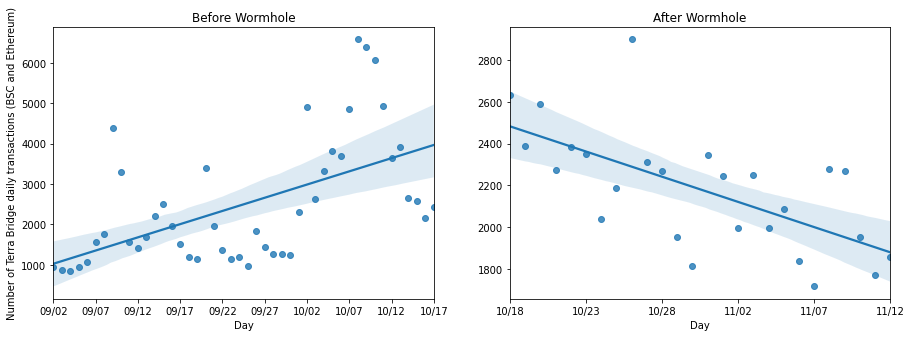

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = sns.regplot([i for i in range(len(before_wh.values))],before_wh.values, ax=axes[0])
xticks = []
for i in range(len(before_wh.index)):
    if(i%round(len(before_wh.index)/10)==0):
        xticks.append(before_wh.index[i])
ax.set_xticklabels(xticks)
ax.set(ylabel='Number of Terra Bridge daily transactions (BSC and Ethereum)', xlabel='Day')
ax.set_title("Before Wormhole")
ax = sns.regplot([i for i in range(len(after_wh.values))],after_wh.values,ax=axes[1])
xticks = []
for i in range(len(after_wh.index)):
    if(i%math.ceil(len(after_wh.index)/6)==0):
        xticks.append(after_wh.index[i])
ax.set_xticklabels(xticks)
ax.set(xlabel='Day')
ax.set_title("After Wormhole")
ax.plot()

**How many addresses, out of all addresses using Terra Bridge, have interacted also with Wormhole?**

For this analysis we include all chians, as we are only interested in seeing who interacted with both bridges and not those that speifically switched bridge to interact with the same chain.

In [85]:
tb_chain_address = tb_all.apply(lambda row: \
                        row.from_address if row.to_address == 'terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2'\
                                     else row.from_address, axis=1)

In [86]:
wh_all = wh_receive_.append(wh_send)
wh_chains_all = wh_receive_.append(wh_send)
both_bridges_address = set(wh_chains_all.address.values)\
                           .intersection(tb_chain_address)

In [87]:
len(both_bridges_address)

864

In [88]:
f"{'{:.2f}'.format(len(both_bridges_address)/len(set(tb_chain_address.values))*100)}% of all addresses using TB have used Wormhole"

'3.36% of all addresses using TB have used Wormhole'

**Let's divide the addresses interacting with Wormhole into two groups: the ones coming from TB and the other ones.**

**What does the density for the two groups look like over time? Has one group used the Wormhole before than the other?**

[Text(0.5, 0, 'Time')]

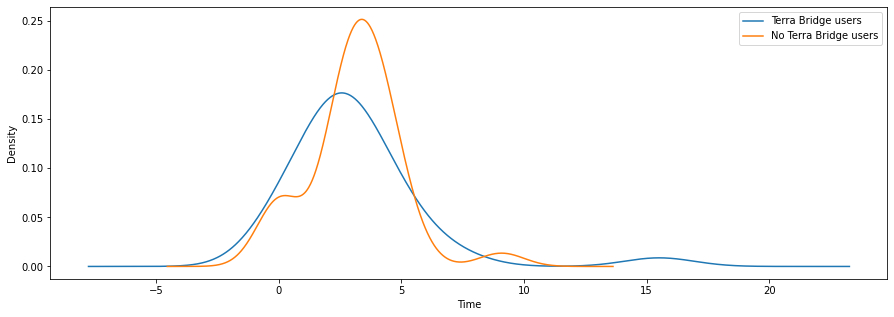

In [76]:
#ax = plt.gca()
df_1 = wh_chains_all[wh_chains_all.address.isin(both_bridges_address)]\
            .groupby('address').month_day.min().value_counts().sort_index().rename('Terra Bridge users')
df_1 = df_1/len(both_bridges_address)*100
df3 = wh_all[~wh_all.address.isin(both_bridges_address)]
df_2 = df3.groupby('address').month_day.min().value_counts().sort_index().rename('No Terra Bridge users')
df_2 = df_2/df3.address.nunique()*100
#.plot(kind='bar', ax=ax)
df_3 = pd.DataFrame([df_1,df_2]).transpose().fillna(0)
ax = df_3.plot(kind='density')
ax.set(xlabel='Time')

Interstingly, it looks like Terra Bridge users have had their peak concentration slightly before the other users. This could be explained by the fact that these users may be more experienced in using bridges and therefore have been eager to try the new bridge. Which led them to be slighlty earlier than the others.

**Observations**
* Terra Bridge's most popular chain is BSC, similar to what we observed for Wormhole (after Solana)
* The number of daily transactions towards/from BSC and Ethereum was increasing before Wormhole launched
* The number has since been decreasing with an average of 24 fewer transactions per day
* Terra Bridge users show a higher density slightly shifted towards the left on the time axis. This means that already experienced bridge users have been among the first to try the new bridge

## Conclusions

In this analysis we have explored some patterns and metrics for the first weeks of activity for the Wormhole on the Terra blockchain. 

To conclude, we hereafter summarize the most significant ones:

* We have identified that the most popular chain, users have interacted with from Terra, is by far Solana.
* We have observed that despite that, Ethereum has been the destination of around 50 millions of UST, which is half of the total amount sent to Solana. 
* The BSC has recently lost its second place as favorit chain to the newly supported Polygon. 
* The biggest transfers are represented by ORION which has bridged large sums of their tokens from other chains to Terra for their Terra launch. 
* Terra Bridge has seen a decrease in usage since the Wormhole launched, as could be expected.
* The most transferred asset is UST (if we look at the number of transactions)

**----------------------------------------------------------------------------------------------------**

# Appendix

## Data preparation

**Imports**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress
import warnings
import json
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.options.display.max_colwidth = 10000

In [2]:
chain_ids = ['Solana', 'Ethereum', 'Terra', 'BSC', 'Polygon']

In [3]:
#with open("./tokens.json", "w") as f:
    #f.write(json.dumps(tokens))
with open("./tokens.json", "r") as f:
    tokens = json.load(f)

In [4]:
url_wh_receive = 'https://api.flipsidecrypto.com/api/v2/queries/657279fb-8a07-4089-bf08-307fb7f1325d/data/latest'
url_wh_receive_tokens = 'https://api.flipsidecrypto.com/api/v2/queries/f5ee257d-91d9-4a1d-a3e3-c2cd14f7790b/data/latest'
url_wh_send = 'https://api.flipsidecrypto.com/api/v2/queries/6cecbc05-4540-4c33-9557-585aec1af791/data/latest'

In [5]:
wh_receive_raw = pd.read_json(url_wh_receive)
wh_receive_token_raw = pd.read_json(url_wh_receive_tokens)
wh_send_raw = pd.read_json(url_wh_send)

**Preparation**

In [6]:
wh_receive = wh_receive_raw[['AMOUNT', 'BLOCK_TIMESTAMP', 'CHAIN_ID',
       'DENOM', 'ORIGINAL_SENDER', 'RECIPIENT', 'SENDER',
       'TX_ID', 'TX_MODULE', 'TX_STATUS', 'TX_TYPE']]
wh_receive = wh_receive[wh_receive.TX_STATUS == 'SUCCEEDED']
wh_receive.columns = [s.lower() for s in wh_receive.columns]
wh_receive.block_timestamp = pd.to_datetime(wh_receive.block_timestamp)
wh_receive['month_day'] = wh_receive.block_timestamp.apply(lambda b: f"{b.month}/{'{:02}'.format(b.day)}")
wh_receive.denom=wh_receive.denom.apply(lambda x: x.replace("\"","") if x else '')
wh_receive.recipient=wh_receive.recipient.apply(lambda x: x.replace("\"","") if x else '')
wh_receive.original_sender=wh_receive.original_sender.apply(lambda x: x.replace("\"","") if x else '')
wh_receive['token_name'] = wh_receive.apply(lambda r: r.denom if r.denom else '', axis=1)

In [7]:
wh_receive_token = wh_receive_token_raw[['AMOUNT', 'BLOCK_TIMESTAMP','RECIPIENT', 'TOKEN_ADDRESS', 'TX_ID', 'TX_STATUS']]
wh_receive_token = wh_receive_token[wh_receive_token.TX_STATUS == 'SUCCEEDED']
wh_receive_token.columns = [s.lower() for s in wh_receive_token.columns]
wh_receive_token.token_address=wh_receive_token.token_address.apply(lambda x: x.replace("\"","") if x else '')
wh_receive_token['token_name'] = wh_receive_token.token_address.apply(lambda x: 
                                            f"{tokens[x]['symbol']}_{chain_ids[int(tokens[x]['asset_chain'])-1]}" if x in tokens else '')

wh_receive_token.block_timestamp = pd.to_datetime(wh_receive_token.block_timestamp)
wh_receive_token['month_day'] = wh_receive_token.block_timestamp.apply(lambda b: f"{b.month}/{'{:02}'.format(b.day)}")

In [8]:
r1 = wh_receive[['amount', 'block_timestamp',
       'recipient', 'original_sender', 'sender', 'tx_id',
       'token_name', 'month_day']]

In [9]:
r2 = wh_receive_token[['amount', 'block_timestamp', 'recipient', 'tx_id',
       'token_name', 'month_day']]
r2['sender'] = r2.recipient
r2['original_sender'] = r2.recipient

In [10]:
wh_receive_ = r1.append(r2)
wh_receive_['year_month_day'] = wh_receive_.block_timestamp.apply(lambda b: f"{b.year}/{'{:02}'.format(b.month)}/{'{:02}'.format(b.day)}")
wh_receive_ = wh_receive_[wh_receive_.year_month_day<'2021/11/15']

In [11]:
wh_send_raw = wh_send_raw[wh_send_raw.TX_STATUS == 'SUCCEEDED']
wh_send = wh_send_raw[['BLOCK_TIMESTAMP',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:ASSET:AMOUNT',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:ASSET:INFO:NATIVE_TOKEN:DENOM',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:ASSET:INFO:TOKEN:CONTRACT_ADDR',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:RECIPIENT_CHAIN',
       'MSG_VALUE:SENDER', 'TX_ID']]
wh_send.columns = ['block_timestamp',
       'amount',
       'denom',
       'token_contract_addr',
       'recipient_chain',
       'sender', 'tx_id']
wh_send.block_timestamp = pd.to_datetime(wh_send.block_timestamp)
wh_send.token_contract_addr=wh_send.token_contract_addr.apply(lambda x: x.replace("\"","") if x else '')
wh_send.denom=wh_send.denom.apply(lambda x: x.replace("\"","") if x else '')
wh_send.amount=wh_send.amount.apply(lambda x: x.replace("\"","") if x else '').astype('int64')
wh_send.sender=wh_send.sender.apply(lambda x: x.replace("\"","") if x else '')
wh_send['token_addr_name'] = wh_send.token_contract_addr.apply(lambda x: 
                                            f"{tokens[x]['symbol']}_{chain_ids[tokens[x]['asset_chain']-1]}" if x in tokens else '')
wh_send['token_name'] = wh_send.apply(lambda r: r.denom if r.denom else r.token_addr_name, axis=1)
wh_send['month_day'] = wh_send.block_timestamp.apply(lambda b: f"{b.month}/{'{:02}'.format(b.day)}")
wh_send['year_month_day'] = wh_send.block_timestamp.apply(lambda b: f"{b.year}/{'{:02}'.format(b.month)}/{'{:02}'.format(b.day)}")
wh_send = wh_send[wh_send.year_month_day<'2021/11/15']

In [12]:
wh_all = wh_receive_.append(wh_send)

In [13]:
def add_missing_days(s):
    missing_days = ['10/08','10/09','10/10','10/11','10/16','10/17']
    for day in missing_days:
        s[day] = 0
    return s.sort_index()

### Terra Bridge - Data
Terra bridge - send:
  - https://api.flipsidecrypto.com/api/v2/queries/e6369cbf-6ea1-4d84-9e45-38ad88caea73/data/latest

Terra bridge - receive:
  - ETH: https://api.flipsidecrypto.com/api/v2/queries/a1688e27-7fcf-44ad-b849-e61dd638d8e1/data/latest
  - Others 1: https://api.flipsidecrypto.com/api/v2/queries/f6ac0f33-eaee-4983-82c3-7bba1ccc0bc2/data/latest
  - Others 2: https://api.flipsidecrypto.com/api/v2/queries/f566ad03-b305-448c-8a14-7908c0bfa7d7/data/latest  

In [14]:
tb_chains = {
    "terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc":"Ethereum",
    "terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2": "BSC",
    "terra1rtn03a9l3qsc0a9verxwj00afs93mlm0yr7chk": "Harmony"
}

In [15]:
url_tb_send = 'https://api.flipsidecrypto.com/api/v2/queries/e6369cbf-6ea1-4d84-9e45-38ad88caea73/data/latest'
url_tb_receive_eth = 'https://api.flipsidecrypto.com/api/v2/queries/a1688e27-7fcf-44ad-b849-e61dd638d8e1/data/latest'
url_tb_receive_others1 = 'https://api.flipsidecrypto.com/api/v2/queries/f6ac0f33-eaee-4983-82c3-7bba1ccc0bc2/data/latest'
url_tb_receive_others2 = 'https://api.flipsidecrypto.com/api/v2/queries/f566ad03-b305-448c-8a14-7908c0bfa7d7/data/latest'


In [16]:
tb_send_raw = pd.read_json(url_tb_send)
tb_receive_eth_raw = pd.read_json(url_tb_receive_eth)
tb_receive_others1_raw = pd.read_json(url_tb_receive_others1)
tb_receive_others2_raw = pd.read_json(url_tb_receive_others2)

In [17]:
tb_send = tb_send_raw
tb_send.columns = [x.lower() for x in tb_send.columns]
tb_send.block_timestamp = pd.to_datetime(tb_send.block_timestamp)
tb_send.denom=tb_send.denom.apply(lambda x: x.replace("\"","") if x else '')
tb_send.from_address=tb_send.from_address.apply(lambda x: x.replace("\"","") if x else '')
tb_send.to_address=tb_send.to_address.apply(lambda x: x.replace("\"","") if x else '')
tb_send['chain'] = tb_send.to_address.apply(lambda x: tb_chains[x] if x in tb_chains else '')

In [18]:
tb_send = tb_send[['amount', 'block_timestamp', 'denom',
       'from_address', 'to_address', 'tx_id', 'chain']]

In [19]:
tb_send.head()

,amount,block_timestamp,denom,from_address,to_address,tx_id,chain
0,5377208,2021-02-19 11:31:50+00:00,uusd,terra1g788na23zczk9tvpaygvqk407rlc463arywdxr,terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2,25EAB5D23F10B4AA8D74E4420B3389F7D9B4650940AE04B16A5D8D640C2BDA78,BSC
1,1.000000000000000e+10,2021-02-19 11:31:56+00:00,uusd,terra1fuem03h44ey7agx6s8ftr6uw9p546skt3jxgl8,terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2,E64048C82E5CC307BC60C60178BF02CA9C97A948936E68B70A961E08BDCC878B,BSC
2,1.000000000000000e+08,2021-02-19 11:34:29+00:00,uusd,terra14d99dqgrq60wjtsa40x2j2pc45khaznr3s9mz9,terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2,EEF0D92DB63F87106E4D2A532F7577445C4D77132D8ED2F3F162BF2FD26EA403,BSC
3,6.877512100000000e+07,2021-02-19 11:45:14+00:00,uusd,terra18clvf9n5e377l9cdjuk38ycw97vhxqnek47rv9,terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2,726E52B80DDD1C2AF08F5752DE0C2D8A750CA5AB282587CA73BC698A09526FB7,BSC
4,3000000,2021-02-19 11:48:31+00:00,uusd,terra1e06ddvprmdjd0pc05kn53cw0kclmmpaj6vrrzx,terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2,88364E3F926522D273BAE09207C3551C0DF70487E43ECD31E13C111D6C2AE36F,BSC


In [20]:
tb_receive = tb_receive_eth_raw.append(tb_receive_others1_raw).append(tb_receive_others2_raw)

In [21]:
tb_receive.columns = [x.lower() for x in tb_receive.columns]
tb_receive.block_timestamp = pd.to_datetime(tb_receive.block_timestamp)
tb_receive.denom=tb_receive.denom.apply(lambda x: x.replace("\"","") if x else '')
tb_receive.from_address=tb_receive.from_address.apply(lambda x: x.replace("\"","") if x else '')
tb_receive.to_address=tb_receive.to_address.apply(lambda x: x.replace("\"","") if x else '')
tb_receive['chain'] = tb_receive.from_address.apply(lambda x: tb_chains[x] if x in tb_chains else '')

In [22]:
tb_receive = tb_receive[['amount', 'block_timestamp', 'denom',
       'from_address', 'to_address', 'tx_id', 'chain']]

In [23]:
tb_receive.head()

,amount,block_timestamp,denom,from_address,to_address,tx_id,chain
0,1.000000000000000e+10,2021-02-08 15:10:32+00:00,uusd,terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc,terra1ykevv8ug5ag9gt2en0lgkd87rryk536w55r56m,0AEA25ED35C2002BFD934DF98B24D5094EE90F20BA35F01F85ED9B6044962835,Ethereum
1,2.001700000000000e+10,2021-02-08 15:14:45+00:00,uusd,terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc,terra1l09rnm06dk46ndavy906qadwu62te037nagm8m,484F47BD32DBA2F8A629CB2FF06604BA8BE0A901BD98E239319B9C3CD8CAD272,Ethereum
2,1.000000000000000e+10,2021-02-08 15:15:18+00:00,uusd,terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc,terra1ykevv8ug5ag9gt2en0lgkd87rryk536w55r56m,8E14D004269685CC90C5565C959935CA63AB3D6A6E7111E435ED2D40CB9614FB,Ethereum
3,1.327400000000000e+10,2021-02-08 15:18:30+00:00,uusd,terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc,terra1l09rnm06dk46ndavy906qadwu62te037nagm8m,324C2DC69248EEAA47DA2A640E72F2DCEC0767EC510FD6B6CF3A05FEB1490694,Ethereum
4,1.872600000000000e+10,2021-02-08 15:18:30+00:00,uusd,terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc,terra1l09rnm06dk46ndavy906qadwu62te037nagm8m,324C2DC69248EEAA47DA2A640E72F2DCEC0767EC510FD6B6CF3A05FEB1490694,Ethereum


In [24]:
tb_receive['type_op'] = 'RECEIVE'
tb_send['type_op'] = 'SEND'

In [25]:
tb_all = tb_send.append(tb_receive)
tb_all['month_day'] = tb_all.block_timestamp.apply(lambda b: f"{'{:02}'.format(b.month)}/{'{:02}'.format(b.day)}")
tb_all['year_month_day'] = tb_all.block_timestamp.apply(lambda b: f"{b.year}/{'{:02}'.format(b.month)}/{'{:02}'.format(b.day)}")
tb_all = tb_all[tb_all.year_month_day<'2021/11/15']
